In [16]:
# Import libraries 
# Scientific computation 
import numpy as np 
from numpy import r_, c_
# Visualization 
import matplotlib.pyplot as plt 
from matplotlib import style 
style.use('ggplot')

In [15]:
import unittest

### Create your dataset
Let's create our dataset based on **N = 500** datapoints of a cosine function <br> y = A*cos(wx) <br>
Where: 
* A = 1 
* w = 1

In [4]:
d = np.array([[12,23,34],
             [45,56,67],
             [78,79,80]])

In [5]:
d.shape

(3, 3)

In [6]:
d.reshape(-1)

array([12, 23, 34, 45, 56, 67, 78, 79, 80])

In [7]:
d.reshape(-1,1) #row unknown

array([[12],
       [23],
       [34],
       [45],
       [56],
       [67],
       [78],
       [79],
       [80]])

In [8]:
d.flatten()

array([12, 23, 34, 45, 56, 67, 78, 79, 80])

In [9]:
d.ravel()

array([12, 23, 34, 45, 56, 67, 78, 79, 80])

In [10]:
# Dataset (linear model)
# Features 
x = np.array([np.random.rand()*4 for i in range(500)]).reshape(-1, 1)
# Labels 
y = np.array([np.cos(i) for i in x]).reshape(-1, 1)

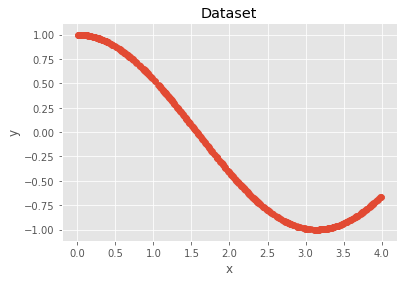

In [11]:
plt.scatter(x, y)
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Define the hypothesis 
Remember the hypothesis is a linear combination of **n** features parameterized by **w** weights. Where **n** is equal to **w**. 
The task is to build two functions. One that initilizes the learning parameters **w**. And another that computes a linear combination using the features and the learning parameters. <br> <br>
** Exercise: ** Complete the function initialize_weights, your task is to return a tensor of the same size as features in order to compute the hypothesis. 

In [19]:
def initialize_weights(features):
    """ 
    Initialize the weights of the learning model
    :param features: tensor that contains the features of the model 
    : return: a tensor that contains random values with the same size of features
    """
    return np.random.rand(features.shape[1], 1)

# Unit test
#test_initialize_weights(x, initialize_weights)

** Exercise: ** Complete the function compute_hypothesis, your task is to return a tensor that contains a linear combination of features and learning parameters.

In [20]:
def compute_hypothesis(features, weights):
    """
    Compute the linear combination of the hypothesis
    :param features: tensor that contains the features of the model
    :param weights: tensor that contains the random-initialized 
                    learning parameters of the model
    : return: a tensor that matrix multiplies the features and the weights
    """
    return np.dot(features, weights)

# Unit test 
#test_compute_hypothesis(compute_hypothesis)

### Cost function
The next step is to program the cost function of the model. Remember that we are working on linear regression, so we are going to use the popular **mean squared error (MSE)** <br> <br>

**Exercise: ** Complete the function cost_function, for this you will make use of the functions you implemented before. 

In [21]:
def cost_function(hypothesis, labels, derivative = False):
    """
    Compute the cost function of a linear regression model 
    :param hypothesis: tensor that contains the linear combination of
                        features and learning parameters
    :param labels: tensor that contains the labels of the dataset
    :param derivative: boolean that controls the output of the derivative of the 
                        cost function
    : return: a value that represents the associated cost for the current hypothesis
            and labels
    """
    m = labels.shape[0]
    E_w = (1 / (2*m)) * np.sum( (hypothesis - labels)**2 )
    if derivative:
        deriv = (1 / m) * np.sum( np.dot((hypothesis - labels).T, x) )
        return E_w, deriv
    else:
        return E_w

# Unit test
#test_cost_function(cost_function)

### Learning algorithm 
The final step is to program the learning algorithm to minimize the cost function and so find the minium point in the **cost function vs learning parameters** function. <br>
The algorithm that we are going to implement is going to be the batch gradient descent (BGD). <br>

**Exercise: ** Tune the hyperparameters for BGD

In [33]:
# Hyperparameters 
epochs = 80
learning_rate = 0.01

**Exercise: ** Complete the steps in the implemantation of BGD. 

In [34]:
# Support variables 
cost_history = []

# Initialize the learning parameters 
weights = initialize_weights(x)
print('weights initialized: {}'.format(weights))

# Compute the algorithm "epochs" times
for e in range(epochs):
    # Some feedback
    print('\n*Iteration number {}'.format(e))
    
    # Hypothesis
    hypothesis = compute_hypothesis(x, weights)
    #print( 'Hypothesis: {}'.format(hypothesis) )
    
    # Cost function
    cost, deriv = cost_function(hypothesis, y, derivative = True)
    cost_history.append(cost)
    print( 'Cost funtion: {}'.format(cost) )
    
    # Update weights
    weights = weights - learning_rate * deriv
    #print('Updated weights: {}'.format(weights))

weights initialized: [[0.18268597]]

*Iteration number 0
Cost funtion: 0.5669440398330651

*Iteration number 1
Cost funtion: 0.5273953612649447

*Iteration number 2
Cost funtion: 0.49176388009809113

*Iteration number 3
Cost funtion: 0.45966160775650033

*Iteration number 4
Cost funtion: 0.43073898495932195

*Iteration number 5
Cost funtion: 0.4046810753955777

*Iteration number 6
Cost funtion: 0.38120413640584977

*Iteration number 7
Cost funtion: 0.3600525293293451

*Iteration number 8
Cost funtion: 0.3409959358733331

*Iteration number 9
Cost funtion: 0.3238268501942071

*Iteration number 10
Cost funtion: 0.30835831938162506

*Iteration number 11
Cost funtion: 0.2944219077420286

*Iteration number 12
Cost funtion: 0.28186586271477243

*Iteration number 13
Cost funtion: 0.2705534624496602

*Iteration number 14
Cost funtion: 0.2603615270527802

*Iteration number 15
Cost funtion: 0.25117907728970645

*Iteration number 16
Cost funtion: 0.24290612614078289

*Iteration number 17
Cost funt

### Visualization of the cost function
In order to convince ourselves that the algorithm is working and we have set the correct hyperparameters, we will plot the **cost function vs the number of epochs**.

** If you see that the cost function is decreasing over time, then the algorithm is working fine **

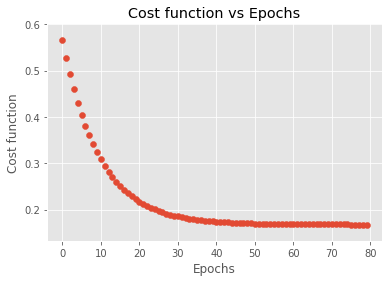

In [35]:
# Let's visualize the learning curve 
plt.scatter([i for i in range(epochs)], cost_history)
plt.title('Cost function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost function')
plt.show()

### Visualization of the result
Finally, let's visualize the **machine learning model vs original data distribution**

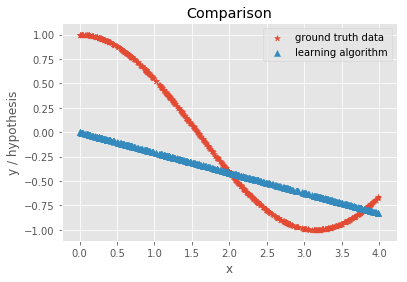

In [36]:
plt.scatter(x, y, label='ground truth data', marker='*')
plt.scatter(x, [each*weights for each in x], label='learning algorithm', marker='^')
plt.title('Comparison')
plt.xlabel('x')
plt.ylabel('y / hypothesis')
plt.legend()
plt.show()

### Adding more features 
At this point you will realize that it is impossible to fit a one parameter model into a non-linear function like a cos(x). So, what would you?
<br>
The answer is to add more parameters to the learning model, so it can fit our non-linear data distribution.
<br>
We will program the adding features part. 

In [37]:
# Add polynomial features
print(x.shape)
x0 = np.ones_like(x)
x1 = x[:,0]**2
x2 = x[:,0]**3
xx = c_[x0, x, x1, x2]
print(xx.shape)

(500, 1)
(500, 4)


In [41]:
# Hyperparameters 
epochs = 500
learning_rate = 0.001

In [42]:
# Support variables 
cost_history = []

# Init weights
weights_xx = initialize_weights(xx)

# Compute the algorithm "epochs" times
for e in range(epochs):
    # Some feedback
    print('\n*Iteration number {}'.format(e))
    
    # Hypothesis
    hypothesis = compute_hypothesis(xx, weights_xx)
    #print( 'Hypothesis: {}'.format(hypothesis) )
    
    # Cost function
    cost, deriv = cost_function(hypothesis, y, derivative = True)
    cost_history.append(cost)
    print(deriv)
    print( 'Cost funtion: {}'.format(cost) )
    
    # Update weights
    weights_xx = weights_xx - learning_rate * deriv
    print('Updated weights:\n {}'.format(weights_xx))


*Iteration number 0
46.157600533804384
Cost funtion: 240.85029165919454
Updated weights:
 [[0.07860804]
 [0.37278228]
 [0.41851019]
 [0.68289742]]

*Iteration number 1
42.875629522519276
Cost funtion: 208.27134309286515
Updated weights:
 [[0.03573241]
 [0.32990665]
 [0.37563456]
 [0.64002179]]

*Iteration number 2
39.82701842583864
Cost funtion: 180.13399670473612
Updated weights:
 [[-0.00409461]
 [ 0.29007963]
 [ 0.33580754]
 [ 0.60019477]]

*Iteration number 3
36.99517451653942
Cost funtion: 155.83097506174218
Updated weights:
 [[-0.04108978]
 [ 0.25308445]
 [ 0.29881236]
 [ 0.5631996 ]]

*Iteration number 4
34.36468486983878
Cost funtion: 134.83815498975767
Updated weights:
 [[-0.07545446]
 [ 0.21871977]
 [ 0.26444768]
 [ 0.52883491]]

*Iteration number 5
31.921232475207496
Cost funtion: 116.70317242536453
Updated weights:
 [[-0.1073757 ]
 [ 0.18679854]
 [ 0.23252645]
 [ 0.49691368]]

*Iteration number 6
29.65151831293432
Cost funtion: 101.03558944765749
Updated weights:
 [[-0.1370

 [ 0.07989525]]

*Iteration number 206
1.1627972813227138e-05
Cost funtion: 0.5777698067532265
Updated weights:
 [[-0.52439414]
 [-0.23021991]
 [-0.184492  ]
 [ 0.07989524]]

*Iteration number 207
1.0801182225516293e-05
Cost funtion: 0.5777697051105577
Updated weights:
 [[-0.52439415]
 [-0.23021992]
 [-0.18449201]
 [ 0.07989523]]

*Iteration number 208
1.0033179414730143e-05
Cost funtion: 0.5777696106951818
Updated weights:
 [[-0.52439416]
 [-0.23021993]
 [-0.18449202]
 [ 0.07989522]]

*Iteration number 209
9.319784359272277e-06
Cost funtion: 0.5777695229931946
Updated weights:
 [[-0.52439417]
 [-0.23021994]
 [-0.18449203]
 [ 0.07989521]]

*Iteration number 210
8.657114251770181e-06
Cost funtion: 0.5777694415272335
Updated weights:
 [[-0.52439418]
 [-0.23021994]
 [-0.18449203]
 [ 0.0798952 ]]

*Iteration number 211
8.041562367074207e-06
Cost funtion: 0.5777693658538815
Updated weights:
 [[-0.52439419]
 [-0.23021995]
 [-0.18449204]
 [ 0.07989519]]

*Iteration number 212
7.46977843006124

Cost funtion: 0.5777683772663946
Updated weights:
 [[-0.52439429]
 [-0.23022006]
 [-0.18449215]
 [ 0.07989509]]

*Iteration number 406
4.559826294325831e-12
Cost funtion: 0.5777683772663516
Updated weights:
 [[-0.52439429]
 [-0.23022006]
 [-0.18449215]
 [ 0.07989509]]

*Iteration number 407
4.235468864521863e-12
Cost funtion: 0.5777683772663118
Updated weights:
 [[-0.52439429]
 [-0.23022006]
 [-0.18449215]
 [ 0.07989509]]

*Iteration number 408
3.934299108721007e-12
Cost funtion: 0.5777683772662748
Updated weights:
 [[-0.52439429]
 [-0.23022006]
 [-0.18449215]
 [ 0.07989509]]

*Iteration number 409
3.6548746251696686e-12
Cost funtion: 0.5777683772662403
Updated weights:
 [[-0.52439429]
 [-0.23022006]
 [-0.18449215]
 [ 0.07989509]]

*Iteration number 410
3.3949767441754375e-12
Cost funtion: 0.5777683772662086
Updated weights:
 [[-0.52439429]
 [-0.23022006]
 [-0.18449215]
 [ 0.07989509]]

*Iteration number 411
3.1534721500747766e-12
Cost funtion: 0.5777683772661787
Updated weights:
 [[-0

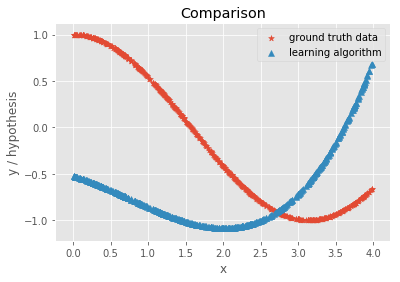

In [43]:
plt.scatter(x, y, label='ground truth data', marker='*')
plt.scatter(x, [compute_hypothesis(each.reshape(1,4), weights_xx.reshape(4,1)) for each in xx], label='learning algorithm', marker='^')
plt.title('Comparison')
plt.xlabel('x')
plt.ylabel('y / hypothesis')
plt.legend()
plt.show()

## Using scikit-learn to fit our model

In [44]:
from sklearn import linear_model
clf = linear_model.LinearRegression(fit_intercept=True)
clf.fit(xx, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
weights_xx = clf.coef_
weights_xx

array([[ 0.        , -0.04213833, -0.57716087,  0.12205761]])

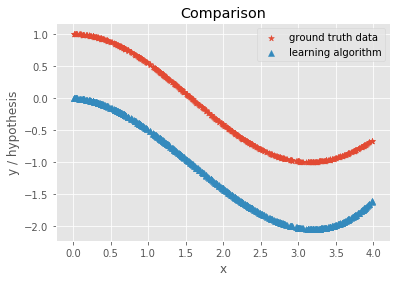

In [46]:
plt.scatter(x, y, label='ground truth data', marker='*')
plt.scatter(x, [compute_hypothesis(each.reshape(1,4), weights_xx.reshape(4,1)) for each in xx], label='learning algorithm', marker='^')
plt.title('Comparison')
plt.xlabel('x')
plt.ylabel('y / hypothesis')
plt.legend()
plt.show()

## Conclusions 
What can we conclude from the exercises?
* This simple implementation of linear regression requires more advanced concepts to make it work nicely. Nonetheless, this is the basic concept and has to be mastered. 
* If the learning rate is too high, the algorithm will diverge. Be careful choosing your values. It also depends on the weight initialization, for now we are using an uniform distribution which does not help very much in the statistical optimization of the problem. It would be better to use a truncated normal distribution. 

* The learning rate and the number of epochs have an inverse relation. 
  * The bigger the learning rate, the less epochs we require. 
  * The smaller the learning rate, the more epochs we require
  
* So far we have been working with normalized data or same-scale data. Which means that the learning algorithm did not have problems with the numerical ranges and precision of the data. However, it is a rule to normalize a dataset before even thinking in applying a machine learning model.  